**Laboratorio de métodos computacionales**

**Universidad de los Andes**

**Profesor: Diego Alberto Castro Rodríguez**

In [1]:
import numpy as np
#!pip3 install sympy
import sympy as sp

ModuleNotFoundError: No module named 'sympy'

## Método del rectángulo

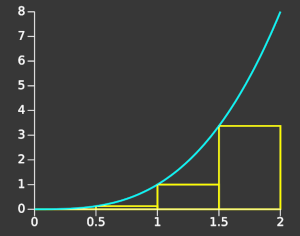

$$\int_a^b f(x) \, dx\approx 
h\sum_{j=0}^{n-1}f(x_j)
$$

*   $n$ es el número de rectángulos. 
*   $h$ es el tamaño de cada partición: $(b-a)/n$. 
*   $x_j=a+jh$. 
*   Un nodo será cada punto donde se evalue la función (ver código a continuación).

In [ ]:
x_ini = 0
x_fin = 10
nodos = 11

def f(x):
  return x**2

def rect_left_integrate(f, x_ini, x_fin, nodos):
  x, h = np.linspace(x_ini, x_fin, num=nodos-1, retstep=True, endpoint=False)
  return h*np.sum(f(x))


rect_left_integrate(f, x_ini, x_fin, nodos)


285.0

## Método del rectángulo centrado

metodo rectangulo centrado_dark.png

$$\int_a^b f(x) \, dx\approx 
h\sum_{j=0}^{n-1}f\left( \frac{x_j+x_{j+1}}{2} \right)
$$

In [ ]:
def rect_center_integrate(f, x_ini, x_fin, nodos):
  x, h = np.linspace(x_ini, x_fin, num=nodos-1, retstep=True, endpoint=False)
  x = x + 0.5*h
  return h*np.sum(f(x))

rect_center_integrate(f, x_ini, x_fin, nodos)

332.5

## Método del trapecio

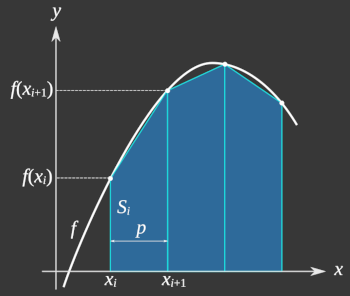

$$\int_a^b f(x) \, dx\approx 
\frac{h}{2}\left(f(x_0)+f(x_n)\right)+h\sum_{j=1}^{n-1}f(x_j)
$$

In [ ]:
def trap_integrate(f, x_ini, x_fin, nodos):
  x, h = np.linspace(x_ini, x_fin, num=nodos, retstep=True)
  return 0.5*h*(f(x[0]) + f(x[-1])) + h*np.sum(f(x[1:-1]))

trap_integrate(f, x_ini, x_fin, nodos)

335.0

## Método de Simpson 1/3 compuesta!

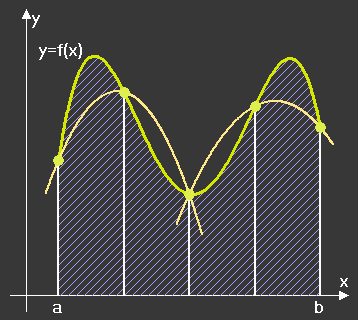

$$\int_a^b f(x) \, dx\approx 
\frac{h}{3}\bigg[f(x_0)+2\sum_{j=1}^{n/2-1}f(x_{2j})+
4\sum_{j=1}^{n/2}f(x_{2j-1})+f(x_n)
\bigg]$$

Se exije que $n$ sea par.

In [ ]:
def simpson_integrate_f(f, x_ini, x_fin, nodos):
  x, h = np.linspace(x_ini, x_fin, num = nodos, retstep=True)
  return (f(x[0]) + 2*np.sum(f(x[2:-1:2])) + 4*np.sum(f(x[1:len(x):2])) + f(x[-1]))*h/3

simpson_integrate_f(f, x_ini, x_fin, nodos)

333.3333333333333

## Cuadratura de Gauss-Legendre

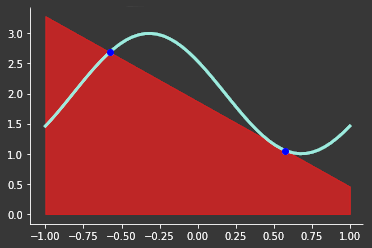

$$\int_{-1}^1 f(x)\,dx \approx \sum_{i=1}^n w_i f(x_i)$$

In [ ]:
X = np.array([-np.sqrt(1/3), np.sqrt(1/3)])
W = np.array([1, 1])

def gauss_legendre_integrate(f,X,W):
  return np.sum(W*f(X))

gauss_legendre_integrate(f,X,W)


0.6666666666666666

## Cuadratura de Gauss-Legendre para intervalo arbitrario

El cambio de variable 

$$x = \frac{b-a}{2}\xi + \frac{a+b}{2}\,\,\,\,\,\,\,\,\,\,\rightarrow \,\,\,\,\,\,\,\,\,\, dx = \frac{b-a}{2}d\xi$$
permite cambiar los limites de integración:


$$\int_a^b f(x)\,dx = \frac{b-a}{2} \int_{-1}^1 f\left(\frac{b-a}{2}\xi + \frac{a+b}{2}\right)\,d\xi.$$

Para el caso discreto resulta

$$\int_a^b f(x)\,dx \approx \frac{b-a}{2} \sum_{i=1}^m w_i f\left(\frac{b-a}{2}\xi_i + \frac{a+b}{2}\right)$$

$m$ es el grado del método de cuadratura de Gauss


In [ ]:
def gauss_legendre_integrate_ab(f,X,W,a,b):
  c1 = 0.5*(b-a)
  c2 = 0.5*(a+b)
  return c1*np.sum(W*f(c1*X + c2))

gauss_legendre_integrate_ab(f,X,W,x_ini,x_fin)

333.33333333333337

In [ ]:
X, W = np.polynomial.legendre.leggauss(2)

gauss_legendre_integrate_ab(f,X,W,x_ini, x_fin)

333.33333333333337

## Cuadratura de Gauss-Legendre compuesta

$$\int_a^b f(x)\,dx \approx \sum_{j = 0}^{n-1}\left[\frac{x_{j+1}-x_j}{2} \sum_{i=1}^m w_i f\left(\frac{x_{j+1}-x_j}{2}\xi_i + \frac{x_{j}+x_{j+1}}{2}\right)\right]$$



In [ ]:
def gauss_legendre_integrate_trosos(func, x_ini, x_fin,X, W):
  limits, h = np.linspace(x_ini, x_fin, num=nodos-1, retstep=True, endpoint=False)
  suma = 0
  for limit in limits: 
    suma += gauss_legendre_integrate_ab(func, X, W, limit, limit + h)
  return suma

gauss_legendre_integrate_trosos(f, x_ini, x_fin, X, W)

333.33333333333337